In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

import networkx as nx

from minimal.imaging import blit_rooms
from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan, PlanMasks
from minimal import sample_graphs
from minimal.rooms import RoomAreas, extract_rooms
from minimal.walls import intersect_rooms, join_wall_corners, _conv_mask, extract_walls

%matplotlib inline

In [5]:
cmapr = ListedColormap(['white', *plt.get_cmap('tab10').colors])
cmapw = ListedColormap(['white', 'black', *plt.get_cmap('tab10').colors])

In [6]:
%%time
pm = PlanMasks.create_from_state(torch.load("data/plan_masks_05.pth"))
rooms = extract_rooms(pm)

CPU times: user 1.38 s, sys: 1.38 ms, total: 1.39 s
Wall time: 1.39 s


In [7]:
rect_mask = sum(room.to_mask() * (i + 1) for i, room in enumerate(rooms))
walls_mask, orient_mask = extract_walls(rooms)

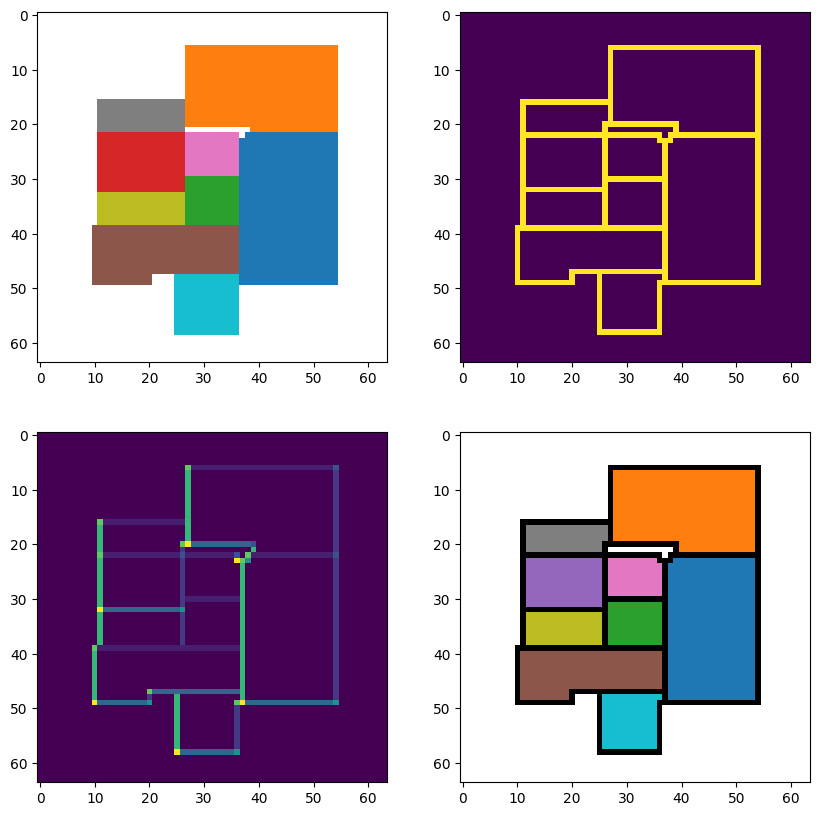

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(rect_mask, cmap=cmapr)

plt.subplot(222)
plt.imshow(walls_mask)

plt.subplot(223)
plt.imshow(orient_mask)

plt.subplot(224)
rooms_with_walls = sum(room.to_mask() * (i + 2) for i, room in enumerate(rooms))
rooms_with_walls[torch.where(walls_mask == 1)] = 1
plt.imshow(rooms_with_walls, cmap=cmapw)